<a href="https://colab.research.google.com/github/MeraBasanti/SmartSyst/blob/master/zyadlab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

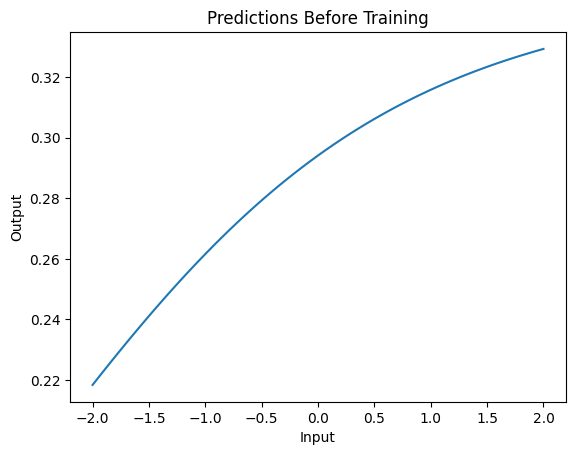

In [1]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()

        self.w00 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w01 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w02 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w11 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w13 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w20 = nn.Parameter(torch.rand(1), requires_grad=False)

    def forward(self, x):

        h1 = torch.sigmoid(self.w00 * x + self.b00) * self.w11
        h2 = torch.sigmoid(self.w01 * x + self.b01) * self.w12
        h3 = torch.sigmoid(self.w02 * x + self.b02) * self.w13

        output = torch.tanh(h1 + h2 + h3) * self.w20
        return output

X = torch.linspace(-2, 2, 100)


simple_nn = SimpleNN()


predictions_before_training = simple_nn(X)

sns.lineplot(x=X.detach().numpy(), y=predictions_before_training.detach().numpy())
plt.title("Predictions Before Training")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()


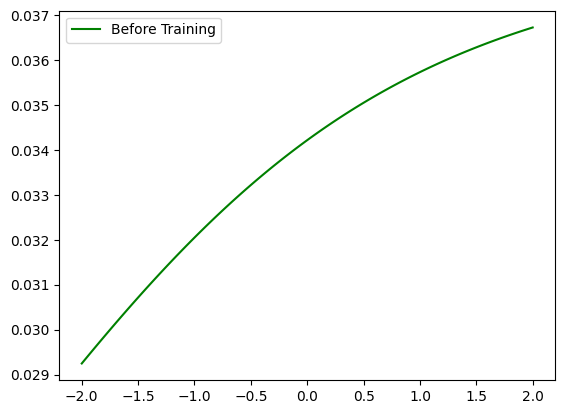

In [5]:

class TrainableNN(nn.Module):
    def __init__(self):
        super(TrainableNN, self).__init__()

        self.w00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w01 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w02 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad=True)

        self.w11 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w13 = nn.Parameter(torch.rand(1), requires_grad=True)

        self.w20 = nn.Parameter(torch.rand(1), requires_grad=True)

    def forward(self, x):
        h1 = torch.sigmoid(self.w00 * x + self.b00) * self.w11
        h2 = torch.sigmoid(self.w01 * x + self.b01) * self.w12
        h3 = torch.sigmoid(self.w02 * x + self.b02) * self.w13
        output = torch.tanh(h1 + h2 + h3) * self.w20
        return output

trainable_nn = TrainableNN()

optimizer = torch.optim.SGD(trainable_nn.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

Y = torch.sin(X * 3)

initial_predictions = trainable_nn(X)

sns.lineplot(x=X.detach().numpy(), y=initial_predictions.detach().numpy(), color='green', label='Before Training')
plt.show()


In [3]:

epochs = 80
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = trainable_nn(X)
    loss = loss_fn(predictions, Y)
    loss.backward()
    optimizer.step()


    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/80], Loss: 0.5813
Epoch [20/80], Loss: 0.5702
Epoch [30/80], Loss: 0.5610
Epoch [40/80], Loss: 0.5534
Epoch [50/80], Loss: 0.5471
Epoch [60/80], Loss: 0.5418
Epoch [70/80], Loss: 0.5373
Epoch [80/80], Loss: 0.5336


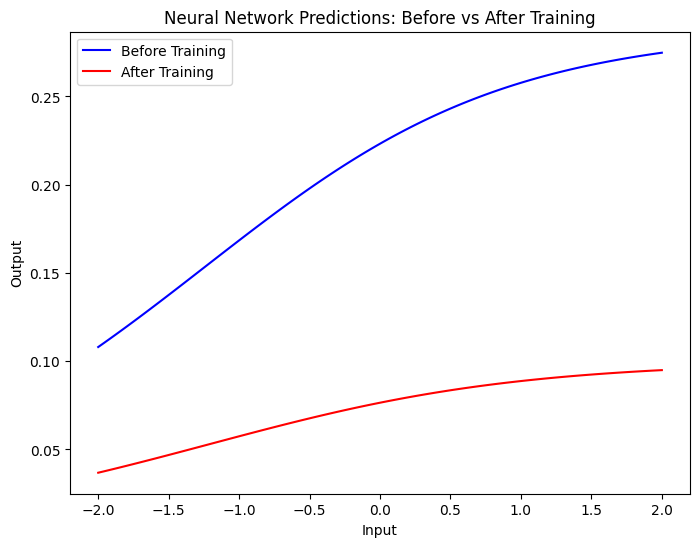

In [4]:

final_predictions = trainable_nn(X)


plt.figure(figsize=(8, 6))
sns.lineplot(x=X.detach().numpy(), y=initial_predictions.detach().numpy(), color='blue', label='Before Training')
sns.lineplot(x=X.detach().numpy(), y=final_predictions.detach().numpy(), color='red', label='After Training')
plt.title("Neural Network Predictions: Before vs After Training")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()
